In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def circle_mid_funct(w_11, w_12, w_21, w_22, b_1, b_2):
    return np.sqrt((b_2**2-2*b_1*b_2*w_22/w_12 + (b_1**2)*(w_22**2)/(w_12**2))/(w_22*w_11/w_12 - w_21)**2 + 
                   (b_2**2-2*b_1*b_2*w_21/w_11 + (b_1**2)*(w_21**2)/(w_11**2))/(w_21*w_12/w_11 - w_22)**2)

def circle_intersect_funct(w_11, w_12, b):
    D = np.sqrt(((b**2)*(w_11**2)/(w_12**2))*(1-1/(w_11**2))-(b**2-w_11**2)/(w_12**2)+1)
    return np.array([-((b*w_11/w_12)+D)/(1+(w_11**2)/(w_12**2)),-((b*w_11/w_12)-D)/(1+(w_11**2)/(w_12**2))])

In [3]:
npoints = 5000000
circle = np.vstack([np.cos(np.linspace(-np.pi,np.pi,100)), np.sin(np.linspace(-np.pi,np.pi,100))])
rand_params = 2*(np.random.rand(npoints,6)-0.5)
f = circle_mid_funct(*rand_params.T)
#f[f<1] = 0
#f[f>=1] = 1

nrn1_intersect = np.count_nonzero(~np.isnan(circle_intersect_funct(rand_params[:,0], rand_params[:,1], rand_params[:,4])),axis=0)
nrn2_intersect = np.count_nonzero(~np.isnan(circle_intersect_funct(rand_params[:,2], rand_params[:,3], rand_params[:,5])),axis=0)

phase_states = np.zeros(npoints) #zero intersection regions
phase_states[np.logical_or(np.logical_and(nrn1_intersect==0,nrn2_intersect>0),
                           np.logical_and(nrn1_intersect>0,nrn2_intersect==0))] = 1 #one intersection
phase_states[np.logical_and(f>=1,np.logical_and(nrn1_intersect>0,nrn2_intersect>0))] = 2 #two intersections and outside of middle
phase_states[np.logical_and(f<1,np.logical_and(nrn1_intersect>0,nrn2_intersect>0))] = 3 #two intersections and inside middle


/var/folders/w5/y_v42n094wqf5j0y62675qx80000gn/T/ipykernel_28570/1241659727.py:6: RuntimeWarning: invalid value encountered in sqrt
  D = np.sqrt(((b**2)*(w_11**2)/(w_12**2))*(1-1/(w_11**2))-(b**2-w_11**2)/(w_12**2)+1)


In [4]:
nrn1_out = rand_params[:,0][:,None]*circle[0] + rand_params[:,1][:,None]*circle[1] + rand_params[:,4][:,None]
nrn2_out = rand_params[:,2][:,None]*circle[0] + rand_params[:,3][:,None]*circle[1] + rand_params[:,5][:,None]

circle_condition = np.any(np.logical_and(nrn1_out>0, nrn2_out>0),axis=1)

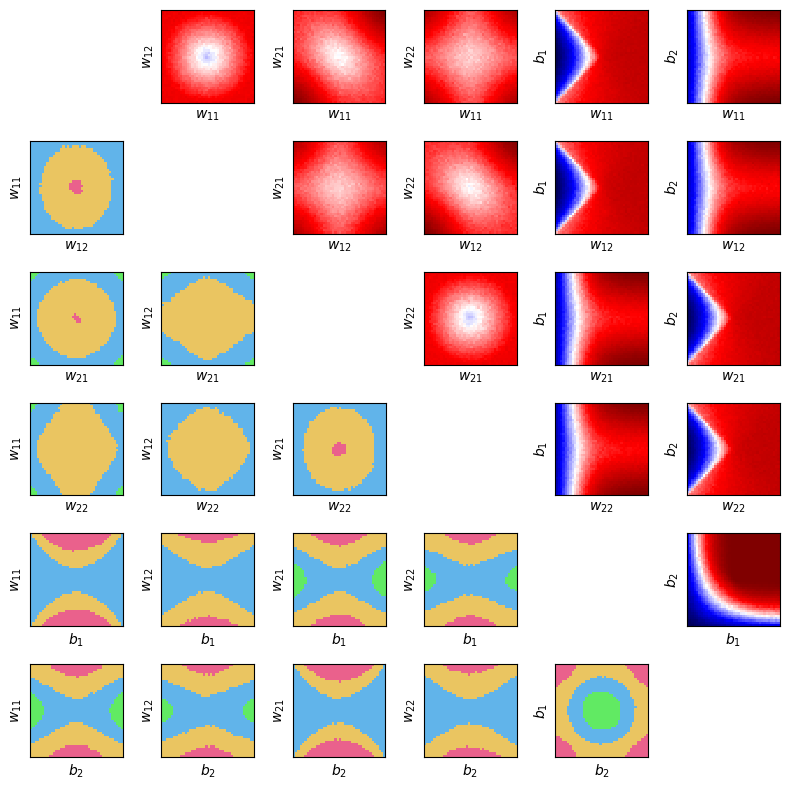

In [7]:
from scipy.stats import binned_statistic_2d
from matplotlib.colors import ListedColormap
colors = ['#ea618c', '#eac561', '#61b4ea', '#61ea63']

# Create a ListedColormap with the specified colors
custom_cmap = ListedColormap(colors)

param_names = ['$w_{11}$','$w_{12}$','$w_{21}$','$w_{22}$','$b_1$','$b_2$']
fig, axs = plt.subplots(6,6,figsize=(8,8))
count = 0
for i in range(len(rand_params.T)):
    for j in range(len(rand_params.T)):
        if i > j:
            stat, xedges, yedges, _ = binned_statistic_2d(rand_params[:,i], rand_params[:,j], bins=40, values=phase_states,statistic=np.nanmean)
            xy_mesh = np.meshgrid(xedges,yedges)
            axs[i,j].pcolormesh(xy_mesh[0],xy_mesh[1],stat,cmap=custom_cmap,vmax=3,vmin=0)#,shading='gouraud')
            #axs[i,j].axis('off')
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
            axs[i,j].set_aspect('equal')
            axs[i,j].set_xlabel(param_names[i])
            axs[i,j].set_ylabel(param_names[j])
        elif i < j:
            stat, xedges, yedges, _ = binned_statistic_2d(rand_params[:,i], rand_params[:,j], bins=40, values=circle_condition.astype(int),statistic=np.nanmean)
            xy_mesh = np.meshgrid(xedges,yedges)
            axs[i,j].pcolormesh(xy_mesh[0],xy_mesh[1],stat,cmap='seismic',vmax=1,vmin=0)#,shading='gouraud')
            #axs[i,j].axis('off')
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
            axs[i,j].set_aspect('equal')
            axs[i,j].set_xlabel(param_names[i])
            axs[i,j].set_ylabel(param_names[j])
        else:
            axs[i,j].axis('off')
fig.tight_layout()
fig.savefig("/Users/kosio/Figures/MfldClassification/circle_transforms.png",dpi=500,transparent=True)